# XAI 2025 TP3

## Features and model selection - Exploration of FuzzyCoCo



Author: Arthur Babey 

Due: 9 april 2025, 23h59


    Based on the work of Diogo Leite (2019), Thibault Showing (2024)
    FuzzyCoCo algorithm based on the PhD thesis of Carlos Peña https://infoscience.epfl.ch/record/33110

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2025: Arthur Babey (<a href="mailto:arthur.babey@heig-vd.ch">arthur.babey@heig-vd.ch</a>)

Date: Spring 2025


# Instructions

Dans ce TP nous allons utiliser [un dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) contenant, pour différents vins, leur tenneur en certain composés chimiques ainsi qu'une note de qualité. 

But du TP:

0. Mettre en place l'environnement (sur Google Colab si l'installation de FuzzyCoCo ne fonctionne pas localement)
1. Explorer FuzzyCoCo sur un dataset simple
2. Créer un modèle via grid-search et cross-validation
3. Analyser les résultats
4. Visualiser les résultats



# 0. Preparatory stage

## Set up the environement

## Google Colab

Si vous utilisez Google colab, vous devrez importer les fichiers à chaque exécution et à la fin, veiller à bien sauvegarder votre notebook. La cellule ci-dessous créé les dossiers nécessaires.

## Installation de FuzzyCoCoPython

Nous allons utilisé une version de FuzzyCoCo disponible sur python grâce à des bindings du code source écris en C et C++, cette version est en cours de développement. Son installation devrait être possible sur toutes les OS mais il est nécessaire d'avoir une version de CMake installé. 

```
pip install git+https://github.com/arthurbabey/fuzzycocopython.git
````


## Installation de LFA Tools

Nous allons également utilisé LFA tools qui est une dépendance à FuzzyCoCoPython. Cette bibliothèque nous aide à simplement visualiser des systèmes flous ainsi nous permet de visualiser les modèles entrainées, des prédictions et l'ensemble des caractéristique des nos modèle de logique floues. 

```
pip install git+https://github.com/arthurbabey/lfa_toolbox.git
```


In [2]:
# Import all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
import random

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


## Explore and prepare the dataset


The first step is to split our dataset into training and test parts (subsets). Modify this if necessary (shouldn't be).

- The path of your original dataset
- The path where you want to save the training data
- The path where you want to save the test data




In [3]:
# Read Dataset
# Indicate the path of the original DS HERE: 
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

csv_path_file_name = './data/winequality-red.csv'

data_load = pd.read_csv(csv_path_file_name)
data_load.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


According to the data source, the quality is a note (integer) between 0 and 10. 
We will quickly binarize the quality by mapping the note to 0 and 1 using a threshold at 5. 

In [4]:
data_load["quality"] = (data_load["quality"] >= 6).astype(int)
data_load["quality"].unique()

array([0, 1])

Now we can do a binary classification


### Train-Test split

In [5]:
# Create the train/test split and reshape the data

X = data_load.iloc[:, 0:-1]
y = data_load.iloc[:,-1]

#Split it into train test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=12, test_size=0.33, stratify=y.values)

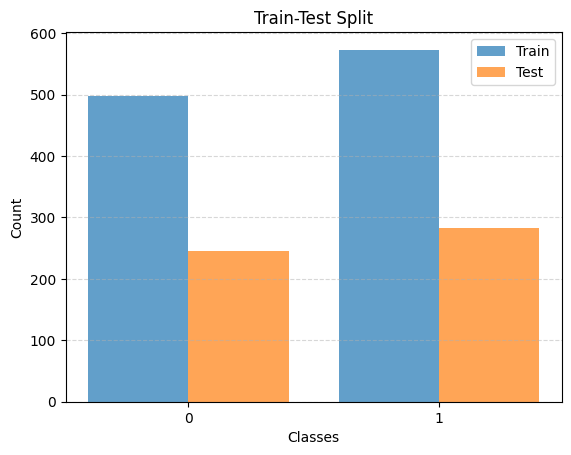

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences in train and test sets
names_train, counts_train = np.unique(y_train, return_counts=True)
names_test, counts_test = np.unique(y_test, return_counts=True)

# Plot distribution
bar_width = 0.4
x_labels = np.arange(len(names_train))

plt.bar(x_labels - bar_width/2, counts_train, bar_width, label='Train', alpha=0.7)
plt.bar(x_labels + bar_width/2, counts_test, bar_width, label='Test', alpha=0.7)

plt.xticks(x_labels, names_train)
plt.title("Train-Test Split")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# 1. Training and predicting with FuzzyCoCo

FuzzyCoCoPython is being developped to match the scikikt-learn API, thus you can use most of the standard lexic of scikit-learn (fit, predict, score) and most of the methods (grid-search, cross-validation).
In the code below you have a description of the (fuzzy logic-based) regression. It is a simple example of how to: 

- Train a model and make a prediction with it
- Save the model in a file
- Visualize the resulting model
- Visualize the predictions

The model bellow is a simple exploration to test two different approaches with FuzzyCoCo. We will optimise the model later. 


In [7]:
from fuzzycocopython import FuzzyCocoClassifier


# Create the model
model = FuzzyCocoClassifier(nbRules=5, maxGenPop1=20, random_state=2)


# Train our classifier and save the model to a file
model.fit(X_train, y_train, output_filename='testFuzzySystem.ffs')

FuzzyCocoClassifier(maxGenPop1=20, nbRules=5, random_state=2)

### Predictions

In [8]:
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7272727272727273

### Visualization 

In [9]:
# visualize the rules
print(model.rules_)
print(model.default_rules_)

[IF (Feature_2 is High), THEN (OUT is Low), IF (Feature_11 is Low), THEN (OUT is Low), IF (Feature_7 is High), THEN (OUT is Low)]
[ELSE (OUT is High)]


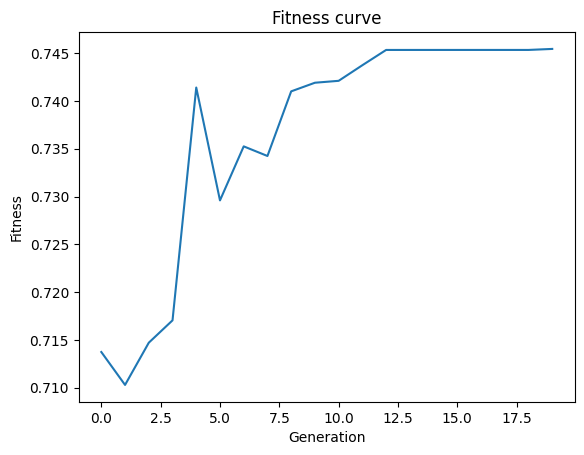

In [10]:
# plot the fitness curve 

plot = model.fitness_history_
plt.plot(plot)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness curve')
plt.show()

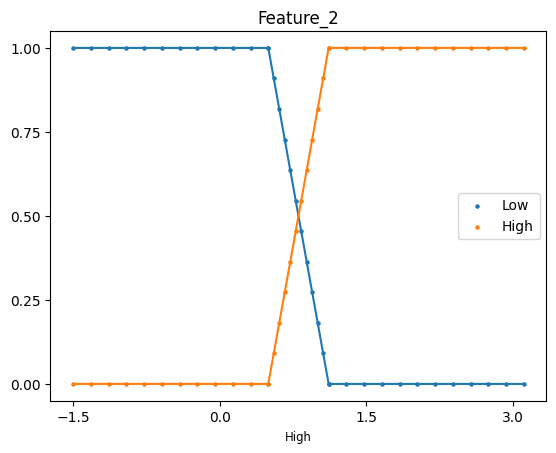

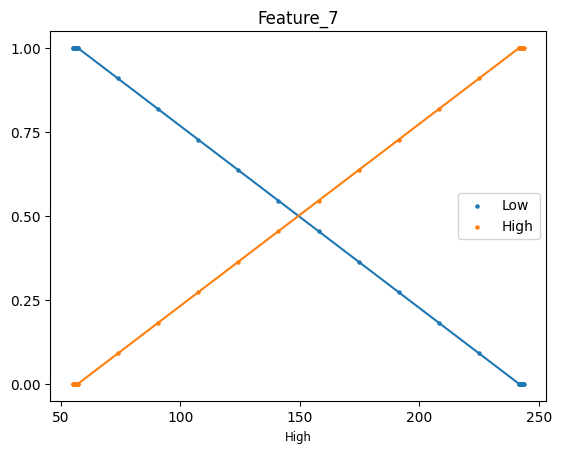

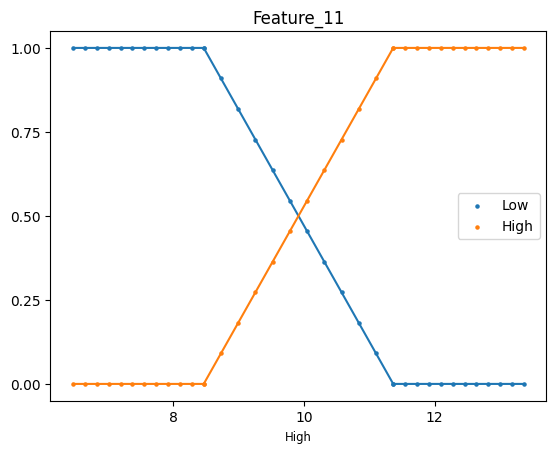

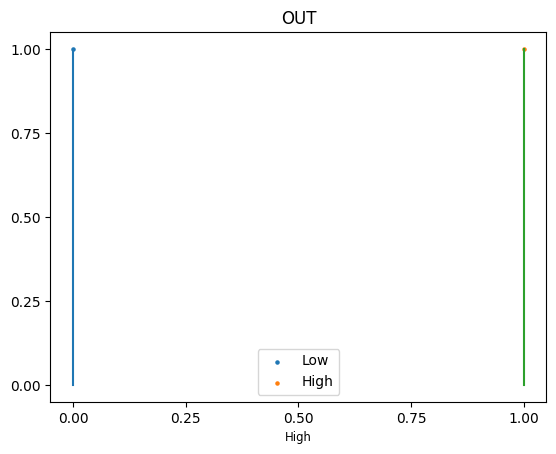

In [11]:
# visualize the fuzzy sets
model.plot_fuzzy_sets()

## Questions


- (1 pt) Décrivez les règles du modèle ?


- (2 pts) Décrivez et commentez la courbe de la fitness : qu'est ce que cela représente ? a-t-on utilisé un nombre suffisant de générations lors de l'entrainement? 


- (2 pts) Décrivez les sets de différentes variables, pourquoi ont-ils tous la même forme? que représentent-ils ?





*Réponse:*

- Les 3 rêgles générées sont les suivantes :
  - `IF (Feature_2 is High), THEN (OUT is Low)` -> Si "l'acidité volatile" est **haute**, alors la qualité est **basse**.
  - `IF (Feature_11 is Low), THEN (OUT is Low)` -> Si le taux d'alcool est **élevé**, alors la qualité est également **élevée**.
  - `IF (Feature_7 is High), THEN (OUT is Low)` -> Si la valeur de `total_sulfur_dioxide` est **élevée**, alors la qualité est **basse**.
  - `ELSE (OUT is High)` -> Règle par défaut : Sinon, la qualité est **bonne**.
- Le "fitness" est un terme utilisé dans les algorithmes génétiques pour désigner la performance d'un modèle (ou d'un individu). La courbe semble atteindre un palier autour des 12 epochs et stagne jusqu'à 20 epochs. Cela dit, il pourrait être intéressant de continuer jusqu'à peut-être 100 epochs pour voir si de meilleures règles peuvent être trouvées.
- Les sets représentent le passage graduelle d'une catégorie à une autre de la valeur d'une feature. Les sets ont relativement la même forme car il n'y a qu'une seule feature et deux classes, la représentation est donc assez symétrique.





---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /5 </b>
</div>

Commentaires: 

---
# Exploration des paramètres 

Avec FuzzyCoCo, nous pouvons explorer trois types de paramètres: 
- Les paramètres de la fitness function qui définisse cette fonction en ajustant les poids des caractéristiques tels que l'accuracy ou la sensitivity. 
- Les paramètres de l'évolution avec l'algorithme génétique, comme par exemple la taille de la population.
- Les paramètres du système flou, comme le nombre de règles maximum ou le nombre de variables par règles. 


- Explorer les paramètres du système flou:
    - [fuzzycoco_base.py](https://github.com/arthurbabey/fuzzycocopython/blob/main/fuzzycocopython/fuzzycoco_base.py)
    - [Description des paramètres](fuzzycoco_parameter_description.md)


### Questions

- (5 pts) Décrivez les paramètres suivants en une ou deux phrases avec vos propres mots: 

    - `nbRules`: Nombre max de règles du modèle.
    - `nbMaxVarPerRule`: Nombre max de variables dans une règle.
    - `nbInSets`: Nombre d'ensembles flous par variable d'entrée. En d'autres termes, le nombre de catégories de chaque variable. Dans l'exemple précédent, il n'y avait que 2 sets flous par variable : Low et High.
      - `sensitivityW`: Comme dit au dessus, les paramètres de la fonction de fitness peuvent être ajustés. `sensitivityW` définit le poids de la sensibilité (une métrique parmis d'autres) dans la fonction de fitness.
    - `maxGenPop1`: C'est le nombre maximal de générations de la population des fonctions d'appartenance. Dans le cadre d'un algorithme génétique, c'est analogue au nombre d'epochs de l'entraînement.

---

### Exercice

En vous basant sur le code donné en exemple [ici](https://github.com/krypty/trefle/blob/5fc398252bbd762c66e12ead9d6295394ac46bd5/examples/grid_search_example.py)

Pour la recherche de paramètre vous pouvez utiliser l'API de scikit-learn avec sklearn.model_selection.GridSearchCV. Adaptez vos choix pour que les entrainements ne prenne pas de temps, nous vous conseillons de fixer le nombre de génération à 40 (maxGenPop1) et le nombre de fold à 3 (CV) ceci limitera l'évolution et permet de gagner du temps.


- (4 pts) Effectuez une recherche de paramètre (au minimum) les paramètres `nbRules` (3,5 et 6) et `nbMaxVarPerRule` (3, 4 et 5). Vous obtiendrez alors le meilleur système. Vous êtes libres d'explorer d'autres paramètres, si vous voulez y mettre le temps. 
- (4 pts) Explorez les différents résultats obtenus lors de la recherche de paramètre. Sans aller voir les détails de chaque système testés, quels sont les avantages et les inconvénients de ces différents systèmes en terme d'efficacité et d'interprétabilité en fonction des paramètres? Est-ce que çela se voit dans les résultats?
- (4 pts) Affichez le meilleur système (retourné par la grid-search cross-validation) et interprétez le (ses règles). Calculez et commentez sa performance (accuracy, F1 score).
- (2 pts) Expliquez ce qu'est la fonction de fitness : quelle importance à-t-elle lors de l'entrainement? comment est-elle influencé par tous les paramètres qui y sont associés (et décrit dans [ce fichier](fuzzycoco_parameter_description.md))


**Attention** : pour éviter un run trop long vous pouvez utilisez cv=2 et limitez le nombre de générations possible (maxGenPop1) à quelques dizaines. Cela va impacter négativement l'entrainement mais sinon l'exécution prend trop de temps.

*Vous êtes libres de la mise en page de vos réponses, laissez simplement la case pour les corrections à la fin.*

In [12]:
import random
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

# Définition de la fonction d'évaluation
def evaluate(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Définition des paramètres à tester
tuned_parameters = [
    {"nbRules":[3,5,6], "nbMaxVarPerRule": [3, 4, 5], "maxGenPop1": [40]}
]

# Recherche des meilleurs hyperparamètres
clf = GridSearchCV(FuzzyCocoClassifier(), tuned_parameters, cv=3, scoring=make_scorer(evaluate), verbose=3)
clf.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Best params: ", clf.best_params_)

# Prédiction sur le test set
y_pred_test = clf.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))

# Enregistrement du meilleur système
clf.best_estimator_.fit(X_train, y_train, output_filename='testFuzzySystem1.ffs')

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=3;, score=0.661 total time=  29.4s
[CV 2/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=3;, score=0.717 total time=  45.3s
[CV 3/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=3;, score=0.700 total time=  20.6s
[CV 1/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=5;, score=0.683 total time= 1.8min
[CV 2/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=5;, score=0.706 total time=  47.9s
[CV 3/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=5;, score=0.661 total time=  29.9s
[CV 1/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=6;, score=0.697 total time= 1.1min
[CV 2/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=6;, score=0.725 total time=  47.2s
[CV 3/3] END maxGenPop1=40, nbMaxVarPerRule=3, nbRules=6;, score=0.742 total time=  57.3s
[CV 1/3] END maxGenPop1=40, nbMaxVarPerRule=4, nbRules=3;, score=0.535 total time=  27.4s
[CV 2/3] END maxGenPop1=40, nbMaxVarPerR

FuzzyCocoClassifier(maxGenPop1=40, nbRules=6)

In [19]:
clf.best_estimator_.rules_

[IF (Feature_1 is High), THEN (OUT is High),
 IF (Feature_11 is High), THEN (OUT is High),
 IF (Feature_10 is High AND_min Feature_8 is Low), THEN (OUT is High)]

In [20]:
clf.best_estimator_.default_rules_

[ELSE (OUT is Low)]

## Réponses aux questions

- (4 pts) Effectuez une recherche de paramètre (au minimum) les paramètres `nbRules` (3,5 et 6) et `nbMaxVarPerRule` (3, 4 et 5). Vous obtiendrez alors le meilleur système. Vous êtes libres d'explorer d'autres paramètres, si vous voulez y mettre le temps. 
- (4 pts) Explorez les différents résultats obtenus lors de la recherche de paramètre. Sans aller voir les détails de chaque système testés, quels sont les avantages et les inconvénients de ces différents systèmes en terme d'efficacité et d'interprétabilité en fonction des paramètres? Est-ce que çela se voit dans les résultats?
  - *Réponse :* Les systèmes avec plus de règles sont généralement plus performants, mais moins interprétables. Par exemple, un système avec 6 règles et 3 variables par règle a une précision de 0.73, tandis qu'un système avec 3 règles et 5 variables par règle a une précision de 0.70. Cependant, le système avec 3 règles est plus facile à interpréter car il est plus simple. En général, il y a un compromis entre la performance et l'interprétabilité : plus le modèle est complexe (plus de règles et de variables), meilleure est la performance, mais moins il est interprétable.
- (4 pts) Affichez le meilleur système (retourné par la grid-search cross-validation) et interprétez le (ses règles). Calculez et commentez sa performance (accuracy, F1 score).
  - *Réponse :* Le meilleur système est celui avec max 6 règles et 3 variables par règle. Il a une précision de 0.73 et un F1 score de 0.75. Les règles sont les suivantes : 
    - `IF (Feature_1 is High), THEN (OUT is High)` -> Si "fixed acidity" est **haute**, alors la qualité est **haute**.
    - `IF (Feature_11 is High), THEN (OUT is High)` -> Si le taux d'alcool est **élevé**, alors la qualité est également **élevée**.
    - `IF (Feature_10 is High AND_min Feature_8 is Low), THEN (OUT is High)` -> Si "sulfate" est **élevé** et que "density" est **faible**, alors la qualité est **haute**.
    - `ELSE (OUT is Low)` -> Règle par défaut : Sinon, la qualité est **Basse**.
- (2 pts) Expliquez ce qu'est la fonction de fitness : quelle importance à-t-elle lors de l'entrainement? comment est-elle influencé par tous les paramètres qui y sont associés (et décrit dans [ce fichier](fuzzycoco_parameter_description.md))
  - *Réponse :* La plupart des paramètres de la fonction de fitness sont les poids associés aux différentes métriques impliquées dans son calcul. Cela peut-être utile en fonction du contexte, si on veut attribuer plus d'importance à la spécificité, l'accuracy, etc... ou si on veut empêcher qu'il y ait trop de règles, on peut changer la valeur de `dontCareW`.



---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /19 </b>
</div>

Commentaires:

---
## Logique flou et explicabilité 

### Exercice

À partir du dataset de test, sélectionnez quatre points représentatifs :

- Vrai positif (TP) : Un point correctement prédit comme positif.
- Faux positif (FP) : Un point prédit positif alors qu'il est négatif.
- Vrai négatif (TN) : Un point correctement prédit comme négatif.
- Faux négatif (FN) : Un point prédit négatif alors qu'il est positif.


Pour chaque point sélectionné, effectuez les tâches suivantes :

- Visualisation : Utilisez la méthode plot_aggregated_output pour visualiser l'agrégation des règles et la prédiction et/où la méthode predict_with_importances pour obtenir la contribution de chaque règle dans la décision finale.
- Explication des règles activées : Identifiez quelles règles (ou quels degrés d'appartenance) sont activées pour le point en question.
- Interprétation : Expliquez comment l'activation de ces règles conduit à la prédiction réalisée par le modèle.

In [50]:
# VOTRE CODE
best_model = clf.best_estimator_

tp_idx = []  # True Positives
tn_idx = []  # True Negatives
fp_idx = []  # False Positives
fn_idx = []  # False Negatives

for i in range(len(y_pred_test)):
    if y_pred_test[i] == 1 and y_test[i] == 1:
        tp_idx.append(i)
    elif y_pred_test[i] == 0 and y_test[i] == 0:
        tn_idx.append(i)
    elif y_pred_test[i] == 1 and y_test[i] == 0:
        fp_idx.append(i)
    elif y_pred_test[i] == 0 and y_test[i] == 1:
        fn_idx.append(i)

In [49]:
#Vérification
print("Accuracy : ", (len(tp_idx) + len(tn_idx)) / len(y_pred_test))

Accuracy :  0.7348484848484849


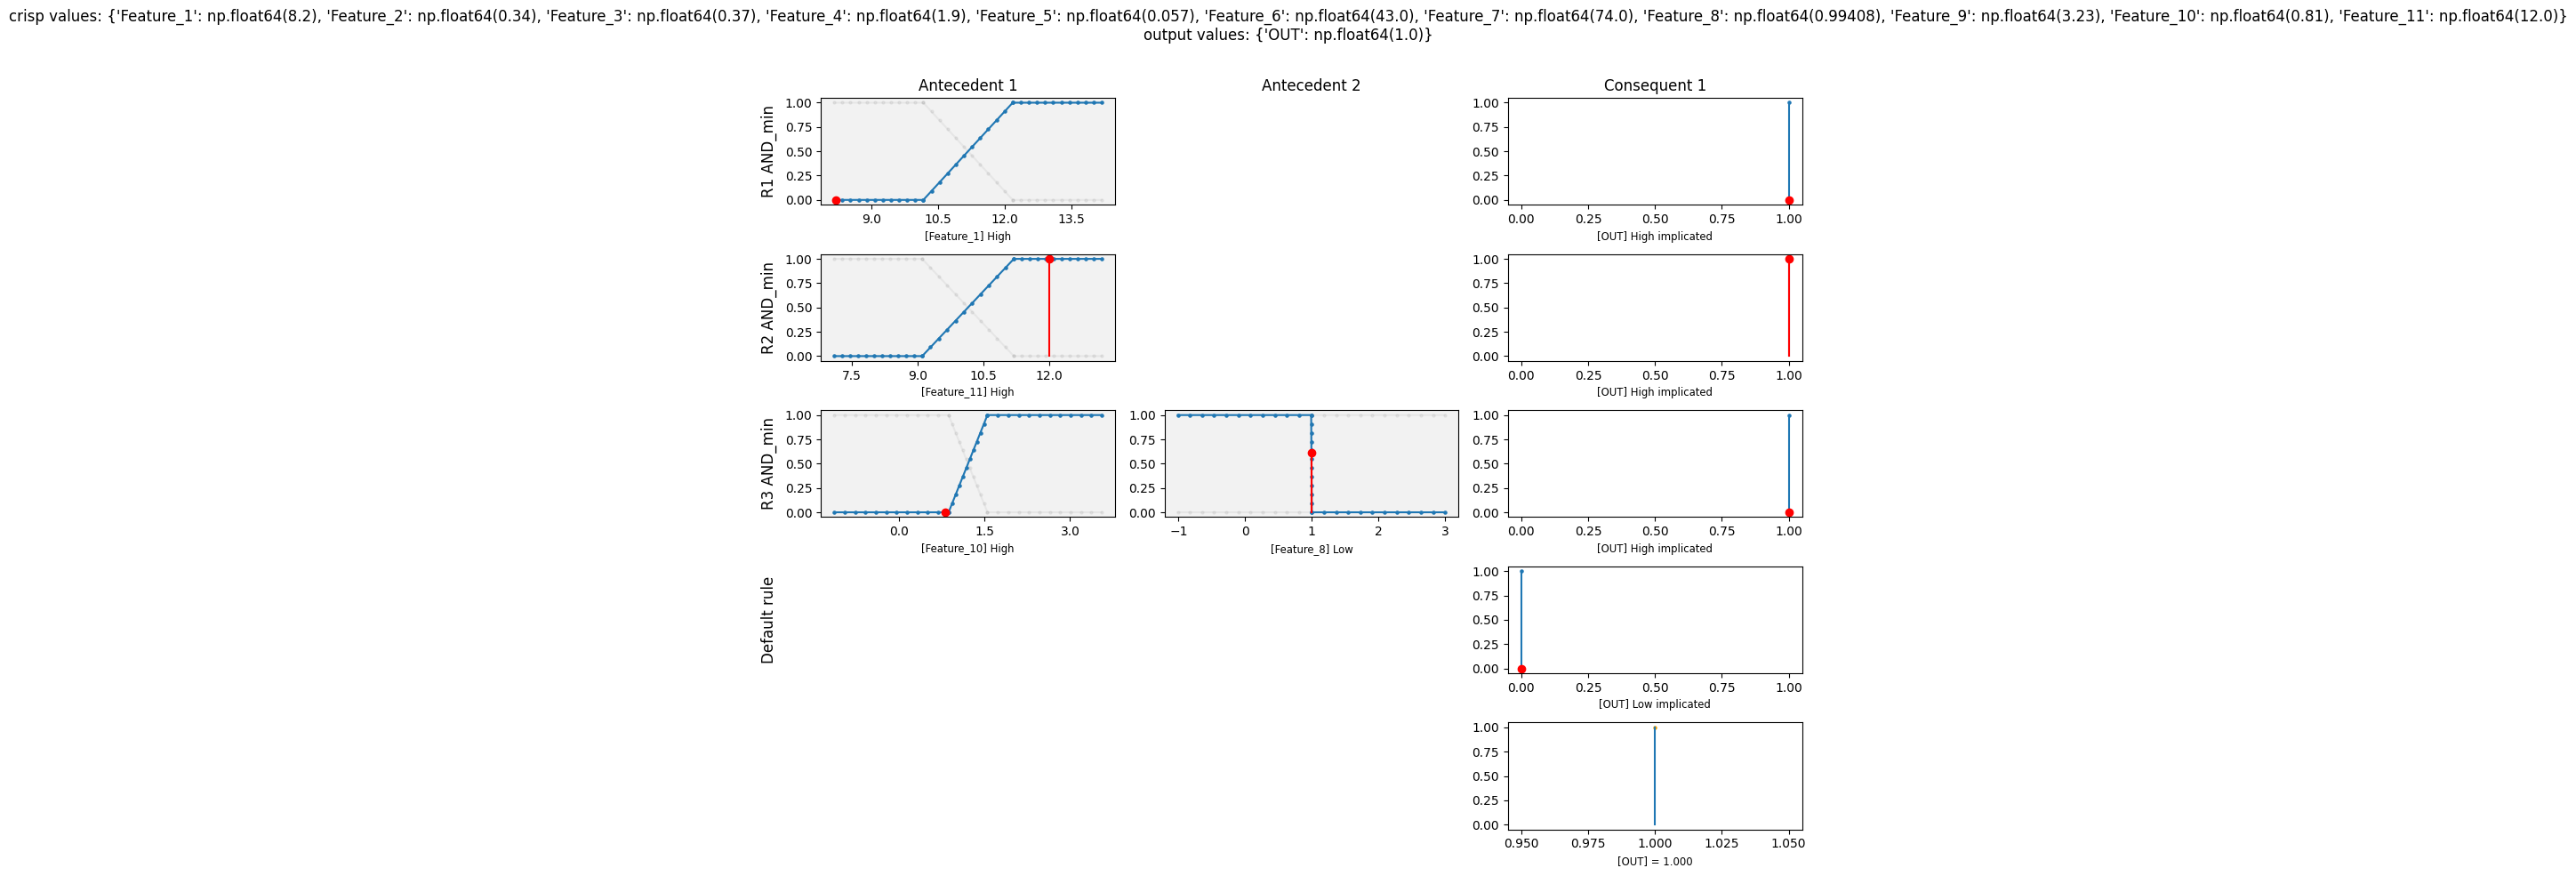

In [41]:
# Example d'un True Positive
best_model.plot_aggregated_output(X_test[tp_idx[0]])

> Vrai Positif :

Quelles règles ont contribué à la prédiction correcte ?
En quoi cette explication renforce-t-elle la confiance dans le modèle ?

*Réponse :* La règle 2 'IF (Feature_11 is High), THEN (OUT is High)' a contribué à la prédiction correcte. Cela renforce la confiance dans le modèle car il est basé sur une caractéristique pertinente (le taux d'alcool) qui est souvent associée à la qualité du vin.

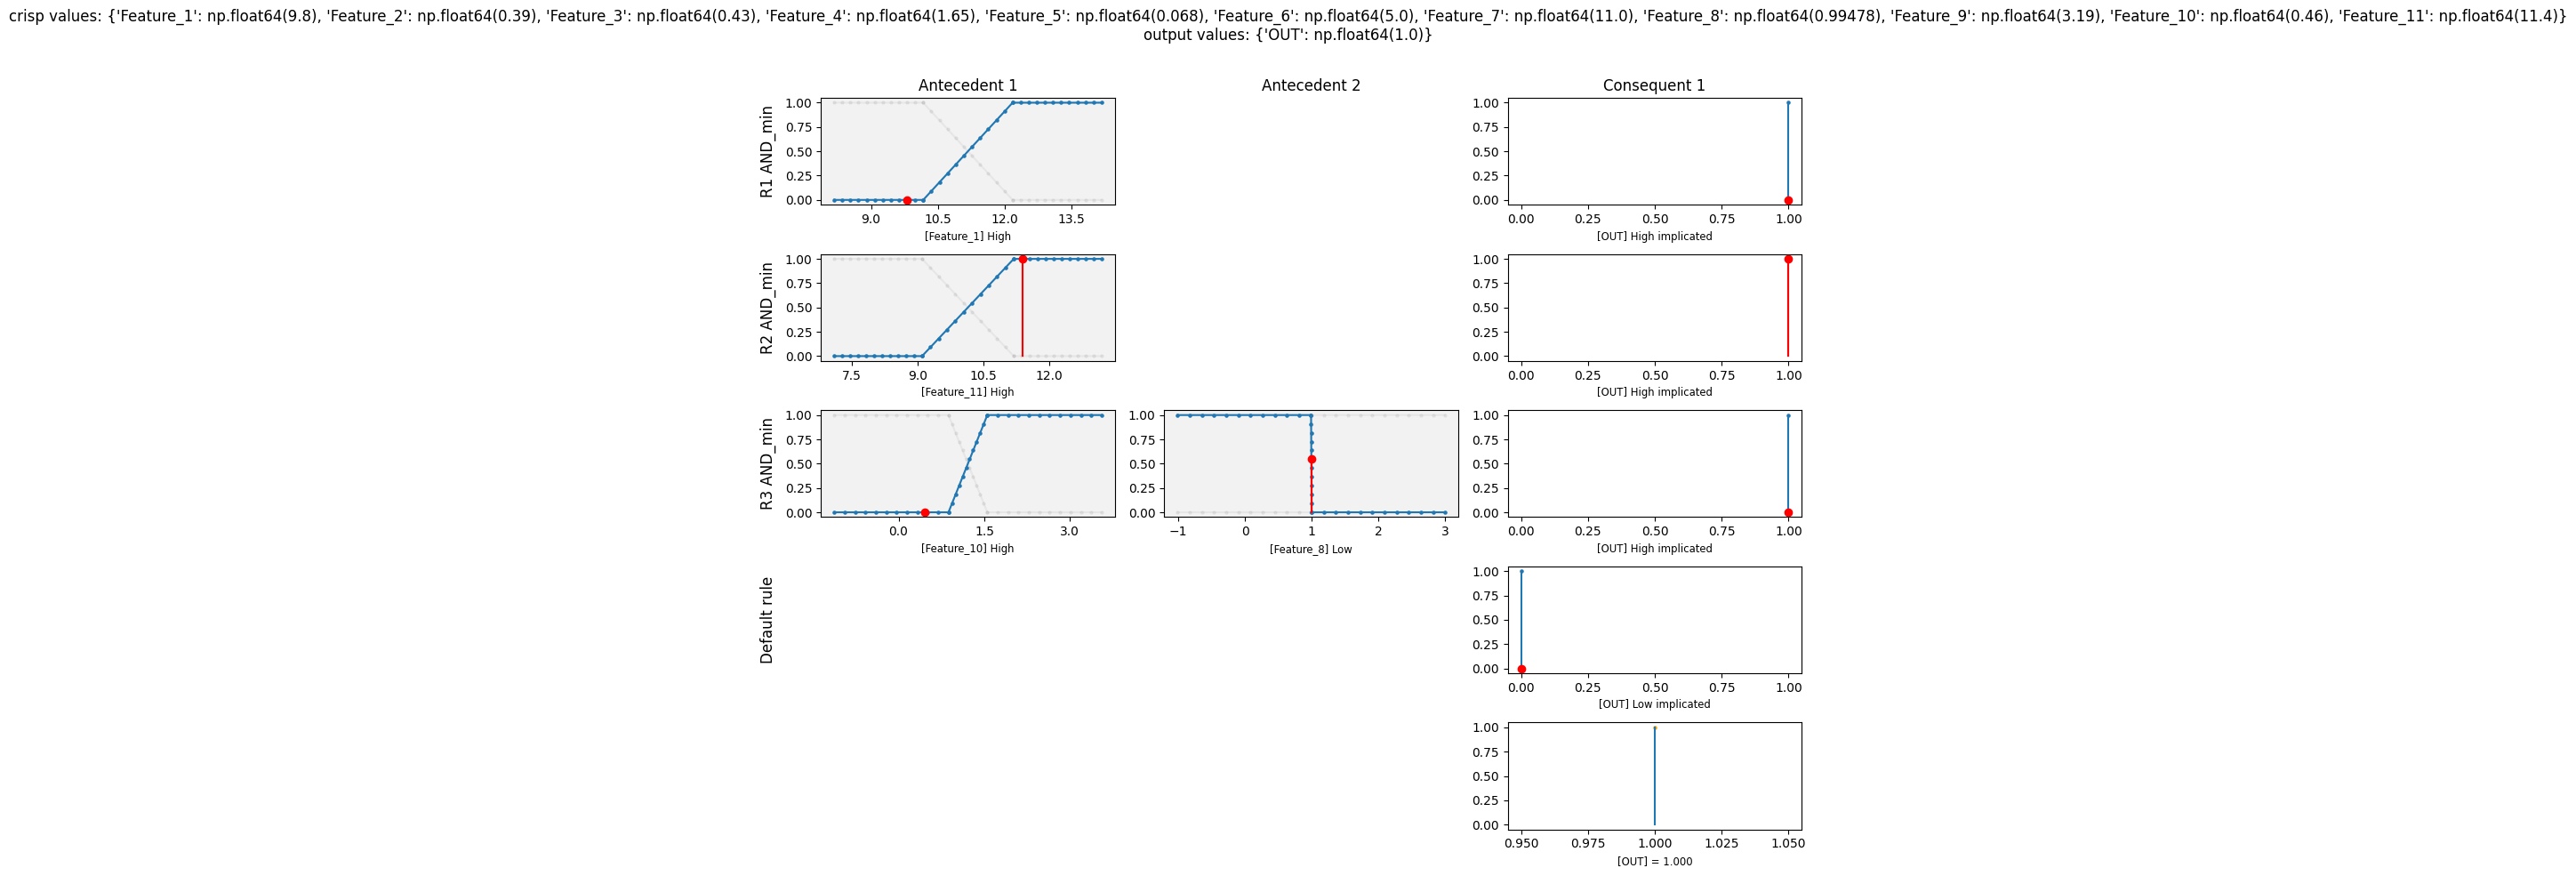

In [42]:
# Example d'un False Positive
best_model.plot_aggregated_output(X_test[fp_idx[0]])

> Faux Positif :

Quelles règles ont conduit à la classification erronée ?

*Réponse :* La règle 2 'IF (Feature_11 is High), THEN (OUT is High)' a conduit à la classification erronée. Cela montre que le modèle peut être trompé par des valeurs extrêmes d'une caractéristique, ce qui soulève des questions sur sa robustesse.

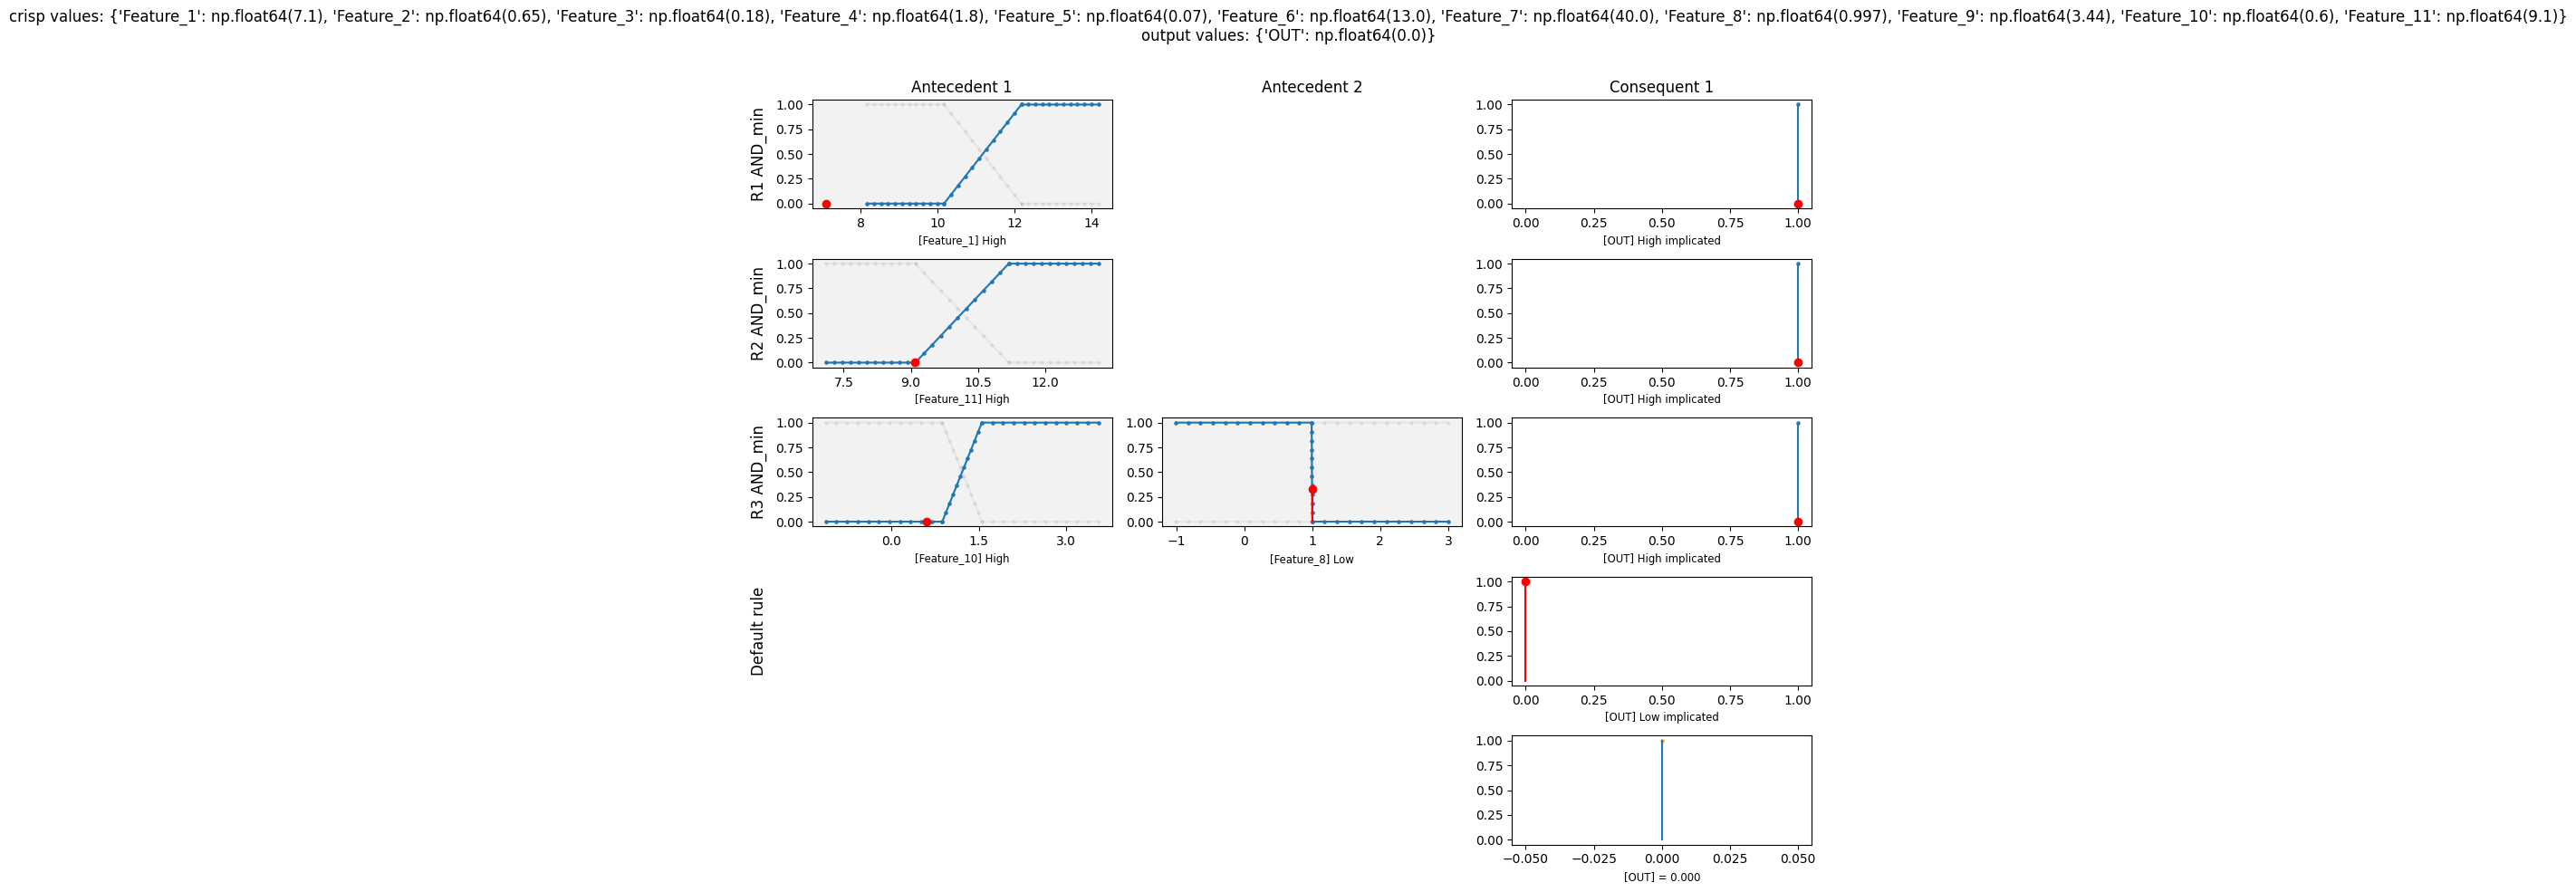

In [43]:
# Example d'un True Negative
best_model.plot_aggregated_output(X_test[tn_idx[0]])

> Vrai Négatif :

Comment l'absence ou la faiblesse de certaines règles a permis une prédiction négative correcte ?

*Réponse* : Ici les 3 règles ont une sortie faible, ce qui a permis à notre règle par défaut de s'appliquer et ainsi classifier le vin comme de mauvaise qualité.

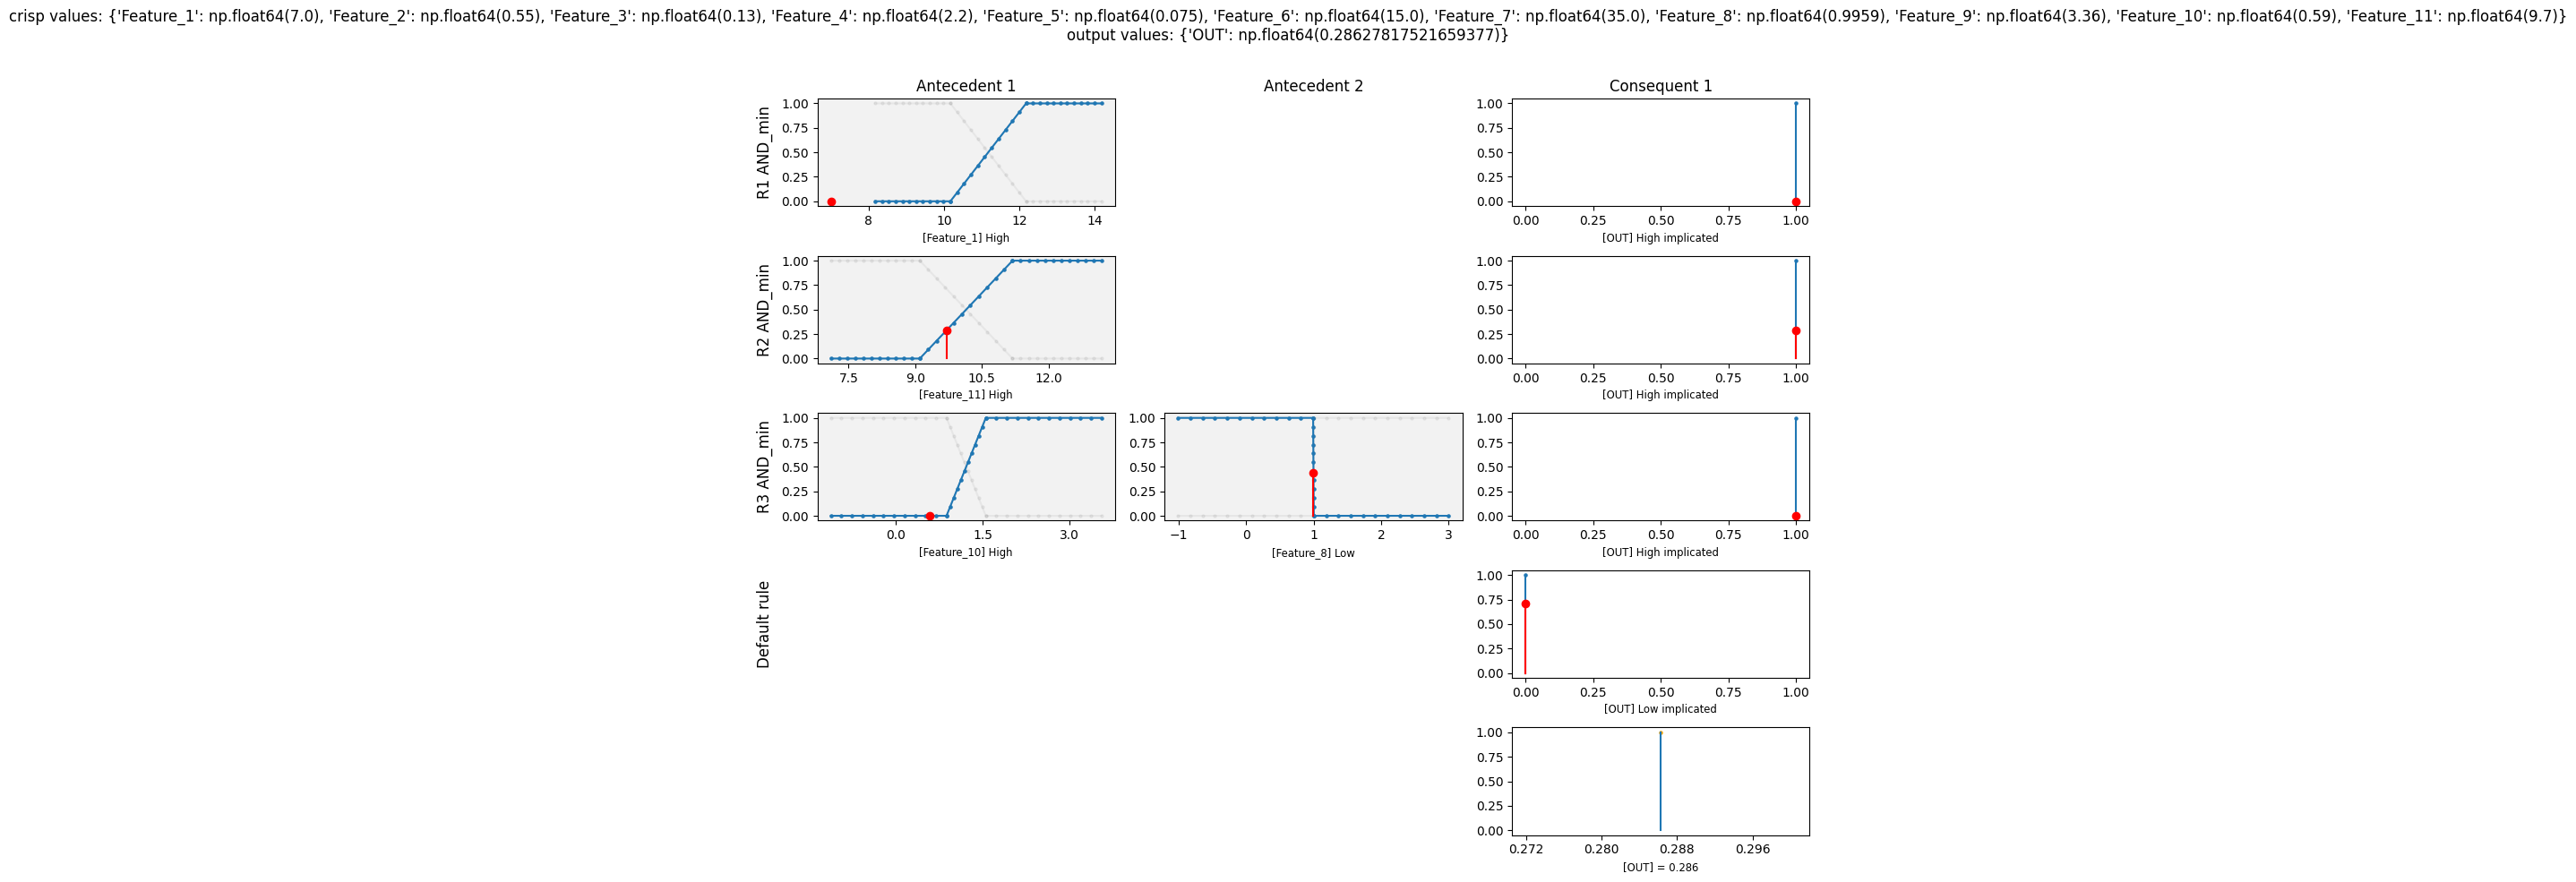

In [44]:
# Example d'un False Negative
best_model.plot_aggregated_output(X_test[fn_idx[0]])

> Faux Négatif :

Pourquoi certaines règles n'ont-elles pas suffi à générer une prédiction positive ?

*Réponse* : Ici les règle ne s'activent pas suffisamment pour "contrer" la règle par défaut. Peu être faudrait t-il augmenter le nombre de règles pour que le modèle puisse mieux s'adapter à ce type de vin.

### Questions 

> Synthèse Générale :

En vous appuyant sur les visualisations et analyses précédentes, expliquez en quoi l'explicabilité du modèle permet de comprendre et, potentiellement, d'améliorer ses performances globales.

*Réponse* : L'explicabilité du modèle permet de comprendre comment les différentes caractéristiques influencent la prédiction. Cela peut aider à identifier les points faibles du modèle et à ajuster les paramètres ou à ajouter des règles pour améliorer ses performances. De plus, cela renforce la confiance des utilisateurs dans le modèle en montrant que les décisions sont basées sur des règles logiques et compréhensibles.

Par exemple ici en analysant les faux positifs et négatifs, on peut voir que le modèle a du mal à classifier certains vins. Cela nous permet de voir que le modèle est sensible à certaines caractéristiques et qu'il pourrait être amélioré en ajoutant des règles ou en ajustant les paramètres.

Notre modèle reste relativement simple, ce qui permet de l'interpréter facilement. Cependant, il pourrait être intéressant d'explorer des modèles plus complexes pour voir si cela améliore les performances.

---

## Questions


- (1 pt) Pourquoi un modèle de logique flou est considéré intérprétable ? 
  - La logique floue est parfaitement inteprétable. Le résultat peut être faux, mais on pourra toujours expliquer comment le modèle est arrivé à ce résultat. 

- (1 pt) Quels avantages offrent les modèles basés sur des règles par rapport aux modèles « boîte noire » en termes d'explicabilité ?
  - Les rêgles peuvent être comprises par des êtres humaines. Elles peuvent être lues et vérifiées. À l'inverse, les 1,2 trillions de paramètres de ChatGPT 4, une boîte noire assez dur à ouvrir, sont impossibles à interpréter (pour l'instant en tout cas).

- (1 pt) Quelles sont les limites potentielles de l'interprétabilité dans les modèles de logique flou ?
  - Premièrement, même si le modèle est facilement inteprétable, il faut quand même connaître les principes de la logique floue (règles, degré d'appartenance, règle par défaut, inférence, etc...) donc cela reste des modèles difficile à interpréter pour des non-experts.
  - De plus, la détermination du degré d'appartenance d'une variable à un ensemble reste relativement floue. En d'autres termes, comment explique-t-on ce degré d'appartenance ? On peut regarder les données d'entraînement et y arriver mais cela n'est pas "obvious" au premier abord.
  - Finalement, un modèle flous avec de nombreuses règles (plus d'une dizaine, p.ex.) est, en pratique, quasiment impossible à intepréter (ou en tout cas cela nécessite beaucoup de temps)

---

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /20 </b>
</div>

Commentaires:

FIN